In [2]:
import numpy as np
import pandas as pd
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
import math 
import seaborn as sns # Более продвинутая библиотека для визуализации
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df = pd.read_csv('HR.csv')
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
print('медианы:','\n', df.median())

медианы: 
 satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64


In [4]:
print('моды:')
for column in df.columns:
    print(column, ' -', df[column].mode()[0])

моды:
satisfaction_level  - 0.1
last_evaluation  - 0.55
number_project  - 4
average_montly_hours  - 135
time_spend_company  - 3
Work_accident  - 0
left  - 0
promotion_last_5years  - 0
department  - sales
salary  - low


<AxesSubplot:>

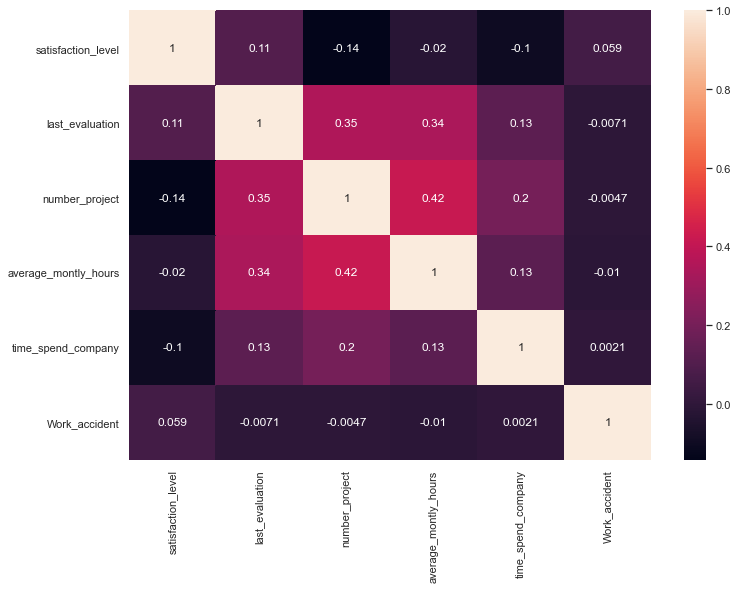

In [5]:
delete = ['department', 'salary','left','promotion_last_5years']
cor = df[[x for x in df.columns if x not in delete]]
cor.corr()
sns.set(rc={'figure.figsize' : (11.7,8.27)})
sns.heatmap(cor.corr(),annot = True,cmap = "rocket" )

In [6]:
a = cor.corr().values
b = [x for l in a for x in l]
c = list(reversed(np.sort(b)))
for el in c:
    if el < 1:
        print(el)
        break
d = list(np.sort(b))
for el in d:
    if el > -1:
        print(el)
        break
## наибменее скоррелированные : number_of_projects и satisfaction_level
#наиболее скоррелированные average_monthly_hours и number_project

0.4172106344017606
-0.14296958603689347


In [7]:
data = df[df.left == 0]
workers = data[['department','satisfaction_level' ]].groupby('department').count()
workers.columns = ['workers_count']
workers

,workers_count
department,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


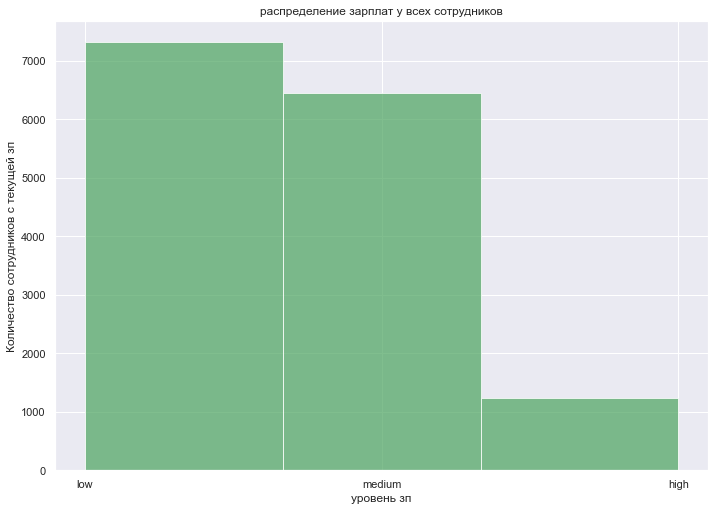

In [42]:
salary = df[['salary']]



plt.figure()
plt.hist(salary,bins = 3 , facecolor='g', alpha=0.75)
plt.xlabel('уровень зп')
plt.ylabel('Количество сотрудников с текущей зп')
plt.title('распределение зарплат у всех сотрудников')
plt.grid(True)
plt.show()

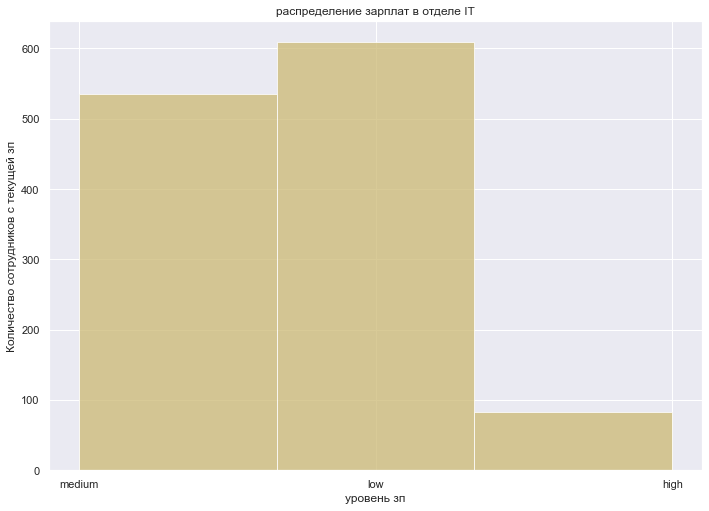

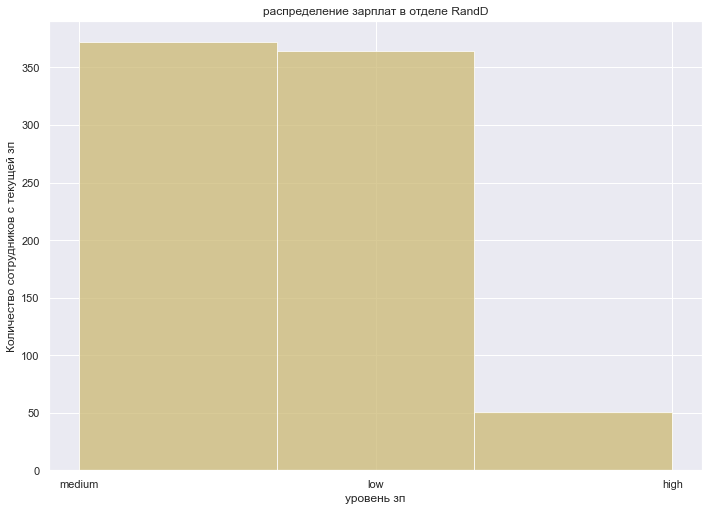

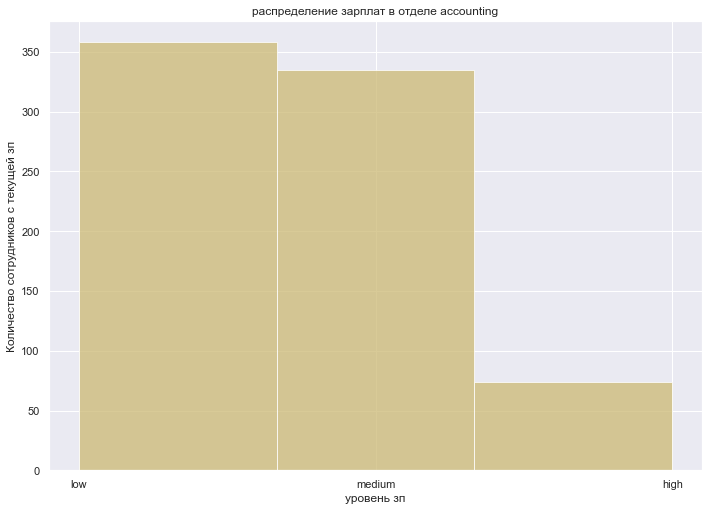

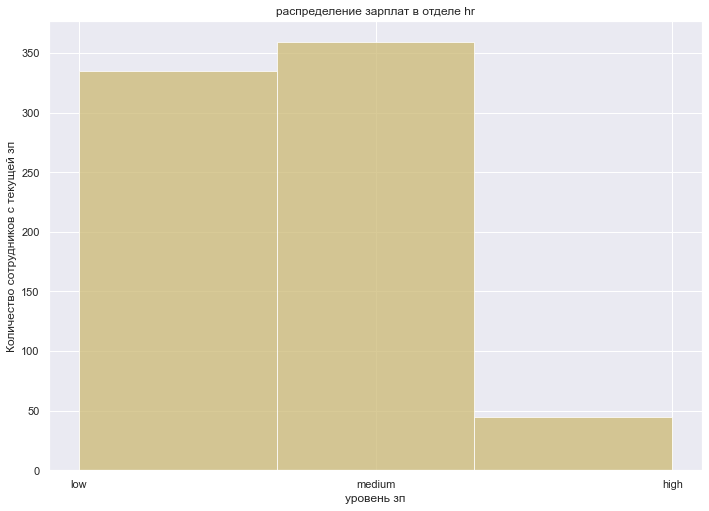

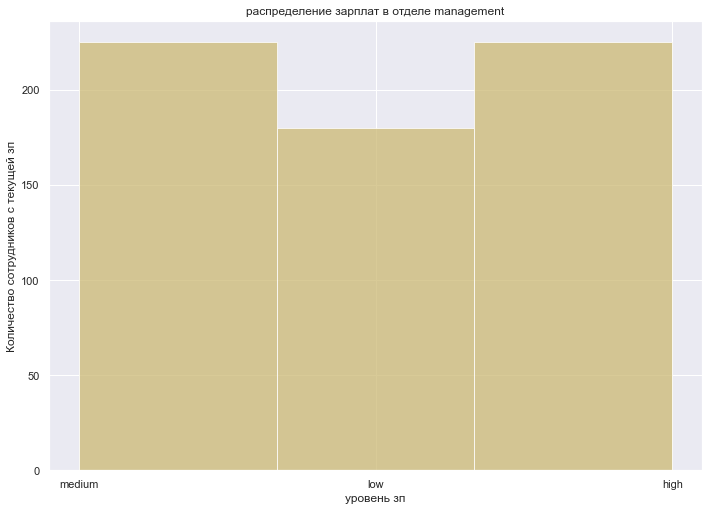

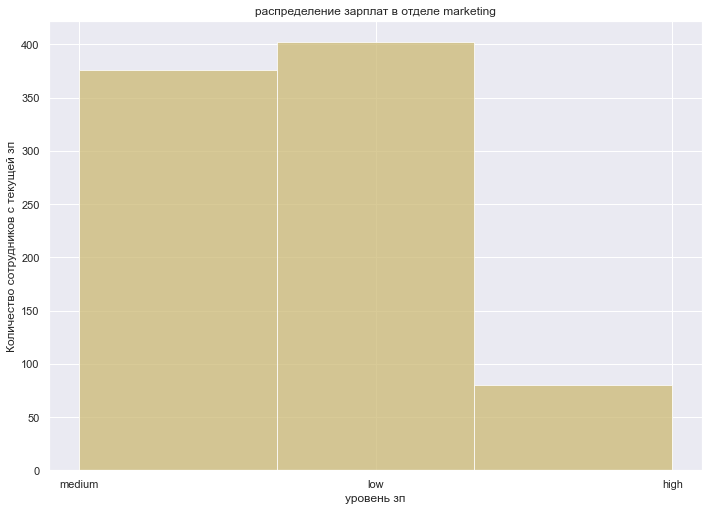

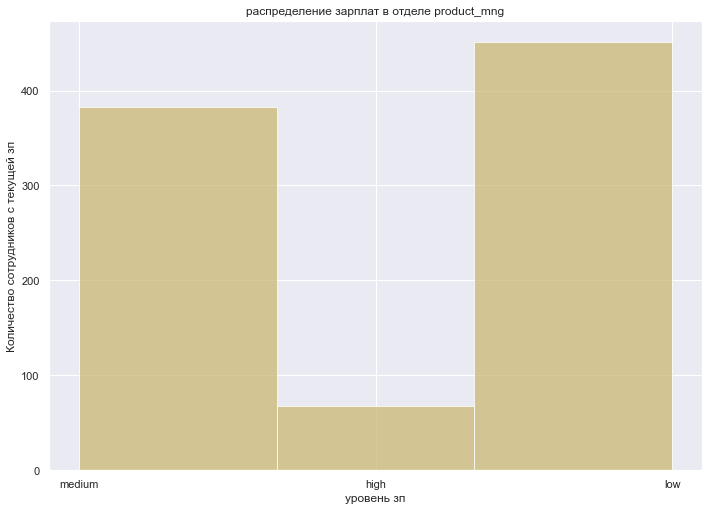

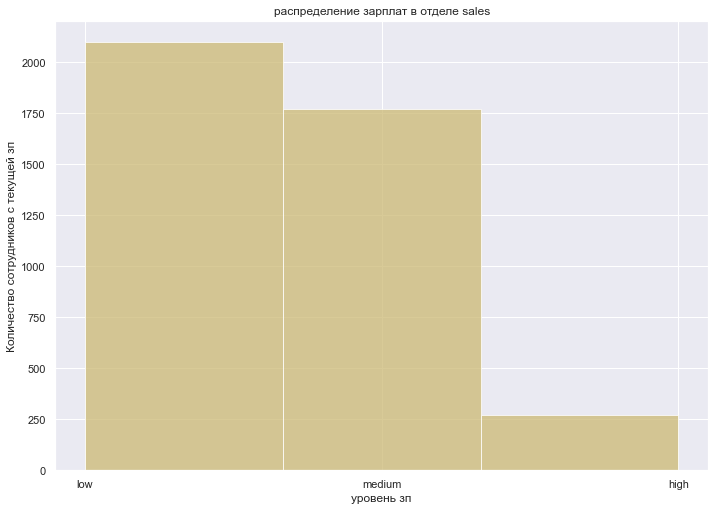

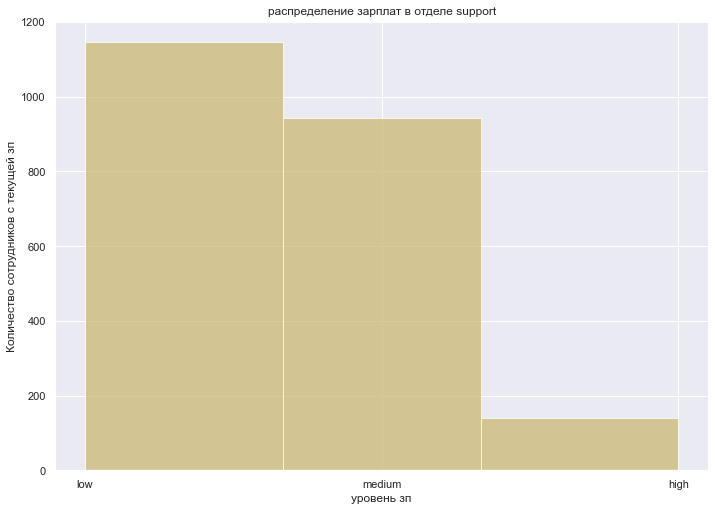

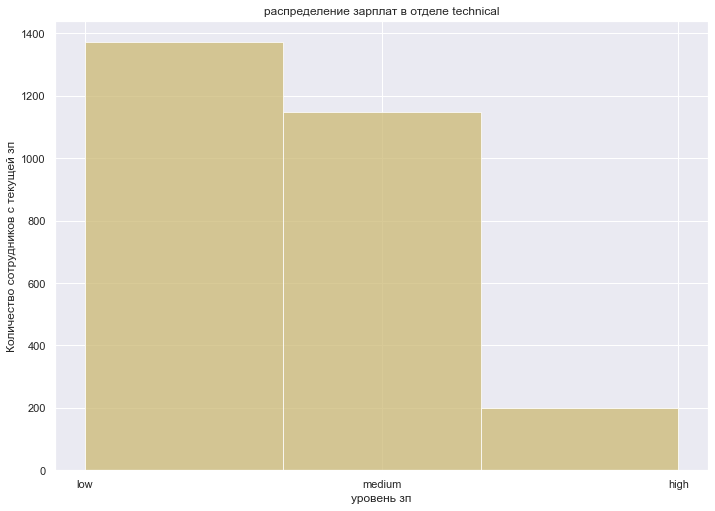

In [48]:
for department in workers.index:
    salary_dep = df[df.department == department]['salary']
    plt.figure()
    plt.hist(salary_dep,bins = 3 , facecolor='y', alpha=0.75)
    plt.xlabel('уровень зп')
    plt.ylabel('Количество сотрудников с текущей зп')
    plt.title(f'распределение зарплат в отделе {department}')
    plt.grid(True)
    plt.show()

In [10]:
A = df[df.salary == 'low'][['average_montly_hours']]
B = df[df.salary == 'high'][['average_montly_hours']]
F, p = scipy.stats.ttest_ind(a = A,b = B, equal_var = False)
print(p)
#с учетом высокого p-value мы не можем принять нашу гипотезу о том, 
#что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

[0.44590455]


In [11]:
fired = df[df.left == 1]
work = df[df.left == 0]
a = work[work.promotion_last_5years == 1]['left'].count()/work['left'].count()
print('доля сотрудников с повышением за последние 5 лет среди работающих:', round(a,3) )
b = work['satisfaction_level'].mean()
print('Средняя степень удовлетворенности среди работающих:', round(b,2))
c =  work['number_project'].mean()
print('Среднее количество проектов среди работающих:', round(c,2))
e = fired[fired.promotion_last_5years == 1]['left'].count()/fired['left'].count()
print('доля сотрудников с повышением за последние 5 лет среди уволившихся:', round(e,3) )
d = fired['satisfaction_level'].mean()
print('Средняя степень удовлетворенности среди уволившихся:', round(d,2))
f =  fired['number_project'].mean()
print('Среднее количество проектов среди уволившихся:', round(f,2))

доля сотрудников с повышением за последние 5 лет среди работающих: 0.026
Средняя степень удовлетворенности среди работающих: 0.67
Среднее количество проектов среди работающих: 3.79
доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.005
Средняя степень удовлетворенности среди уволившихся: 0.44
Среднее количество проектов среди уволившихся: 3.86


In [64]:
np.random.seed(42)
delete_1  = ['department', 'salary','left']
data = df[[x for x in df.columns if x not in delete_1]]
target = df['left'].array
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778

In [13]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
